In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

Read a CSV data file.

In [2]:
df = pd.read_csv('../input/perthweather/PerthWeather.csv')

As the Data documentation sais, RISK_MM and Date doesnt help us to find out wether tommorow gonna rain or not, also location column is always contains "Perth" so we can remove these three columns and move on.

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-07-01,Perth,2.7,18.8,0.0,0.8,9.1,ENE,20.0,NaN,...,53.0,1027.6,1024.5,2.0,3.0,8.5,18.1,No,0.0,No
1,2008-07-02,Perth,6.4,20.7,0.0,1.8,7.0,NE,22.0,ESE,...,39.0,1024.1,1019.0,0.0,6.0,11.1,19.7,No,0.4,No
2,2008-07-03,Perth,6.5,19.9,0.4,2.2,7.3,NE,31.0,NaN,...,71.0,1016.8,1015.6,1.0,3.0,12.1,17.7,No,1.8,Yes
3,2008-07-04,Perth,9.5,19.2,1.8,1.2,4.7,W,26.0,NNE,...,73.0,1019.3,1018.4,6.0,6.0,13.2,17.7,Yes,1.8,Yes
4,2008-07-05,Perth,9.5,16.4,1.8,1.4,4.9,WSW,44.0,W,...,57.0,1020.4,1022.1,7.0,5.0,15.9,16.0,Yes,6.8,Yes


In [4]:
df.drop(columns = ['RISK_MM', 'Location', 'Date'], axis = 1, inplace=True)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2.7,18.8,0.0,0.8,9.1,ENE,20.0,NaN,E,0,...,97.0,53.0,1027.6,1024.5,2.0,3.0,8.5,18.1,No,No
1,6.4,20.7,0.0,1.8,7.0,NE,22.0,ESE,ENE,6,...,80.0,39.0,1024.1,1019.0,0.0,6.0,11.1,19.7,No,No
2,6.5,19.9,0.4,2.2,7.3,NE,31.0,NaN,WNW,0,...,84.0,71.0,1016.8,1015.6,1.0,3.0,12.1,17.7,No,Yes
3,9.5,19.2,1.8,1.2,4.7,W,26.0,NNE,NNW,11,...,93.0,73.0,1019.3,1018.4,6.0,6.0,13.2,17.7,Yes,Yes
4,9.5,16.4,1.8,1.4,4.9,WSW,44.0,W,SW,13,...,69.0,57.0,1020.4,1022.1,7.0,5.0,15.9,16.0,Yes,Yes


In [5]:
df.isnull().sum()

MinTemp            0
MaxTemp            1
Rainfall           0
Evaporation        1
Sunshine           5
WindGustDir        5
WindGustSpeed      5
WindDir9am       134
WindDir3pm         7
WindSpeed9am       0
WindSpeed3pm       1
Humidity9am        9
Humidity3pm        8
Pressure9am        1
Pressure3pm        1
Cloud9am           2
Cloud3pm           4
Temp9am            0
Temp3pm            1
RainToday          0
RainTomorrow       0
dtype: int64

<Axes: >

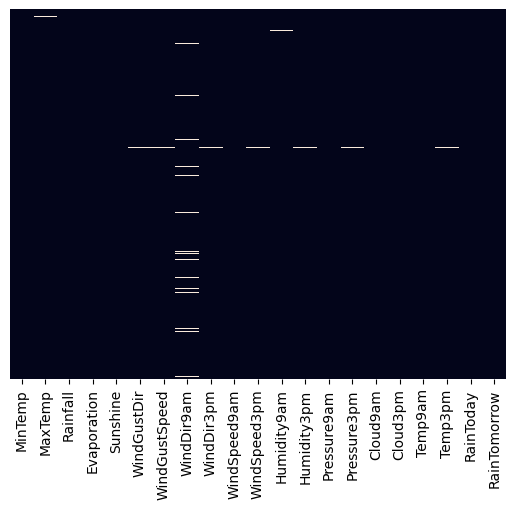

In [6]:
sns.heatmap(df.isnull(), cbar = False, yticklabels=False)

Ok then. Let's handle the *boolean*s (RainToday and RainTomorrow)

<Axes: >

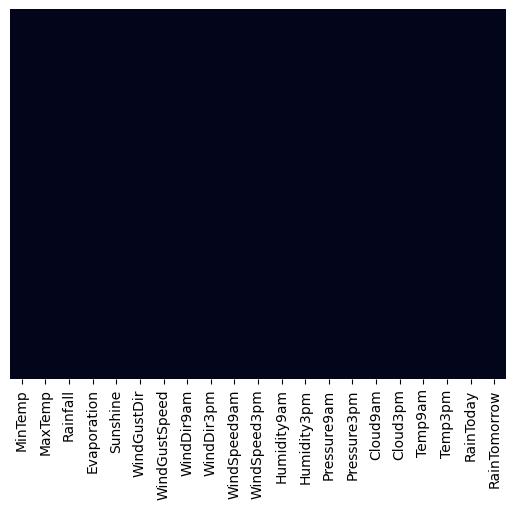

In [7]:
df.dropna(inplace = True)
sns.heatmap(df.isnull(), cbar = False, yticklabels=False)

In [8]:
df['RainToday'] = df.RainToday.apply(lambda x: 1 if x == 'Yes' else 0)
df['RainTomorrow'] = df.RainTomorrow.apply(lambda x: 1 if x == 'Yes' else 0)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1,6.4,20.7,0.0,1.8,7.0,NE,22.0,ESE,ENE,6,...,80.0,39.0,1024.1,1019.0,0.0,6.0,11.1,19.7,0,0
3,9.5,19.2,1.8,1.2,4.7,W,26.0,NNE,NNW,11,...,93.0,73.0,1019.3,1018.4,6.0,6.0,13.2,17.7,1,1
4,9.5,16.4,1.8,1.4,4.9,WSW,44.0,W,SW,13,...,69.0,57.0,1020.4,1022.1,7.0,5.0,15.9,16.0,1,1
5,0.7,15.9,6.8,2.4,9.3,NNE,24.0,ENE,NE,4,...,86.0,41.0,1032.0,1029.6,0.0,1.0,6.9,15.5,1,0
6,0.7,18.3,0.0,0.8,9.3,N,37.0,NE,NNE,15,...,72.0,36.0,1028.9,1024.2,1.0,5.0,8.7,17.9,0,0


In Wind Dir columns the data represented as "Cardinal Derections". I want to change them with numbers too. But as for example North, North of North West and North of North East are close (and others are close that way too) i want to assign a number to them so it shows the cyclical behaviour of these columns.

In [9]:
dirs = ['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW']
angles = np.arange(0.0, 2.0*np.pi, 2.0*np.pi / 16.0)
wind_angles = dict(zip(dirs, angles))
print(wind_angles)

{'N': 0.0, 'NNE': 0.39269908169872414, 'NE': 0.7853981633974483, 'ENE': 1.1780972450961724, 'E': 1.5707963267948966, 'ESE': 1.9634954084936207, 'SE': 2.356194490192345, 'SSE': 2.748893571891069, 'S': 3.141592653589793, 'SSW': 3.5342917352885173, 'SW': 3.9269908169872414, 'WSW': 4.319689898685965, 'W': 4.71238898038469, 'WNW': 5.105088062083414, 'NW': 5.497787143782138, 'NNW': 5.890486225480862}


In [10]:
df['WindGustDir'] = df.WindGustDir.apply(lambda x: wind_angles[x])
df['WindDir9am'] = df.WindDir9am.apply(lambda x: wind_angles[x])
df['WindDir3pm'] = df.WindDir3pm.apply(lambda x: wind_angles[x])
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1,6.4,20.7,0.0,1.8,7.0,0.785398,22.0,1.963495,1.178097,6,...,80.0,39.0,1024.1,1019.0,0.0,6.0,11.1,19.7,0,0
3,9.5,19.2,1.8,1.2,4.7,4.712389,26.0,0.392699,5.890486,11,...,93.0,73.0,1019.3,1018.4,6.0,6.0,13.2,17.7,1,1
4,9.5,16.4,1.8,1.4,4.9,4.319690,44.0,4.712389,3.926991,13,...,69.0,57.0,1020.4,1022.1,7.0,5.0,15.9,16.0,1,1
5,0.7,15.9,6.8,2.4,9.3,0.392699,24.0,1.178097,0.785398,4,...,86.0,41.0,1032.0,1029.6,0.0,1.0,6.9,15.5,1,0
6,0.7,18.3,0.0,0.8,9.3,0.000000,37.0,0.785398,0.392699,15,...,72.0,36.0,1028.9,1024.2,1.0,5.0,8.7,17.9,0,0


Ok then. Now lets replace the resulting values with sin and cos of each of them.

In [11]:
wind_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
for col in wind_columns:
    df[col + '_cos'] = np.cos(df[col])
    df[col + '_sin'] = np.sin(df[col])

df.drop(columns = wind_columns, inplace = True)    
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_cos,WindGustDir_sin,WindDir9am_cos,WindDir9am_sin,WindDir3pm_cos,WindDir3pm_sin
1,6.4,20.7,0.0,1.8,7.0,22.0,6,9.0,80.0,39.0,...,11.1,19.7,0,0,7.071068e-01,0.707107,-3.826834e-01,0.923880,0.382683,0.923880
3,9.5,19.2,1.8,1.2,4.7,26.0,11,6.0,93.0,73.0,...,13.2,17.7,1,1,-1.836970e-16,-1.000000,9.238795e-01,0.382683,0.923880,-0.382683
4,9.5,16.4,1.8,1.4,4.9,44.0,13,17.0,69.0,57.0,...,15.9,16.0,1,1,-3.826834e-01,-0.923880,-1.836970e-16,-1.000000,-0.707107,-0.707107
5,0.7,15.9,6.8,2.4,9.3,24.0,4,7.0,86.0,41.0,...,6.9,15.5,1,0,9.238795e-01,0.382683,3.826834e-01,0.923880,0.707107,0.707107
6,0.7,18.3,0.0,0.8,9.3,37.0,15,13.0,72.0,36.0,...,8.7,17.9,0,0,1.000000e+00,0.000000,7.071068e-01,0.707107,0.923880,0.382683


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3025 entries, 1 to 3192
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MinTemp          3025 non-null   float64
 1   MaxTemp          3025 non-null   float64
 2   Rainfall         3025 non-null   float64
 3   Evaporation      3025 non-null   float64
 4   Sunshine         3025 non-null   float64
 5   WindGustSpeed    3025 non-null   float64
 6   WindSpeed9am     3025 non-null   int64  
 7   WindSpeed3pm     3025 non-null   float64
 8   Humidity9am      3025 non-null   float64
 9   Humidity3pm      3025 non-null   float64
 10  Pressure9am      3025 non-null   float64
 11  Pressure3pm      3025 non-null   float64
 12  Cloud9am         3025 non-null   float64
 13  Cloud3pm         3025 non-null   float64
 14  Temp9am          3025 non-null   float64
 15  Temp3pm          3025 non-null   float64
 16  RainToday        3025 non-null   int64  
 17  RainTomorrow  

In [13]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_cos,WindGustDir_sin,WindDir9am_cos,WindDir9am_sin,WindDir3pm_cos,WindDir3pm_sin
count,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,...,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3025.000000,3.025000e+03,3.025000e+03,3.025000e+03,3025.000000
mean,13.066215,25.188066,1.850579,5.720099,8.864231,35.214545,11.172893,14.687603,61.841983,46.664463,...,18.750975,23.589223,0.195702,0.203636,-0.231307,-0.166099,-3.717500e-03,3.866739e-01,-2.890298e-01,-0.284834
std,5.016832,6.089981,5.729202,3.416345,3.463399,9.357921,4.634048,5.087261,17.226630,16.675994,...,5.287251,5.858412,0.396806,0.402768,0.658521,0.696823,6.620009e-01,6.422659e-01,5.992738e-01,0.690274
min,-0.600000,13.000000,0.000000,0.000000,0.000000,11.000000,2.000000,2.000000,13.000000,6.000000,...,5.700000,8.400000,0.000000,0.000000,-1.000000,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000
25%,9.500000,20.400000,0.000000,2.800000,6.700000,30.000000,7.000000,11.000000,50.000000,36.000000,...,14.800000,19.100000,0.000000,0.000000,-0.707107,-0.707107,-7.071068e-01,1.224647e-16,-7.071068e-01,-0.923880
50%,13.200000,24.100000,0.000000,5.000000,9.500000,35.000000,11.000000,15.000000,61.000000,47.000000,...,18.500000,22.600000,0.000000,0.000000,-0.382683,-0.382683,6.123234e-17,7.071068e-01,-3.826834e-01,-0.707107
75%,16.700000,29.500000,0.200000,8.400000,11.600000,41.000000,15.000000,19.000000,74.000000,57.000000,...,22.400000,27.400000,0.000000,0.000000,0.382683,0.707107,7.071068e-01,9.238795e-01,6.123234e-17,0.382683
max,29.700000,44.400000,114.400000,17.000000,13.900000,83.000000,30.000000,31.000000,99.000000,97.000000,...,39.000000,42.500000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
